In [11]:
import numpy as np
import pandas as pd

In [12]:
df=pd.read_csv("C:\\Users\\HP\\Desktop\\creditcard.csv")

In [15]:
df=df.drop("ID_code",axis=1)

In [16]:
df

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


<AxesSubplot:ylabel='target'>

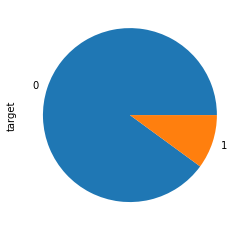

In [21]:
df["target"].value_counts().plot(kind="pie")

In [22]:
X=df.drop("target",axis=1)

In [24]:
y=df["target"]

In [28]:
!pip install imblearn

In [31]:
from imblearn.over_sampling import SMOTE 

In [32]:
sm=SMOTE(random_state=10)

In [33]:
Xsm,ysm=sm.fit_resample(X,y)

In [34]:
Xsm.shape,ysm.shape

((359804, 200), (359804,))

# Concat X1 and y1..after Re-sampling by SMOTE

In [38]:
dffinal=pd.concat([Xsm,ysm],axis=1)

In [39]:
dfsample=dffinal.sample(50000)

In [40]:
X=dfsample.drop("target",axis=1)

In [41]:
y=dfsample["target"]

In [42]:
from sklearn.model_selection import *

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [45]:
from sklearn.ensemble import *
from xgboost import XGBClassifier

In [47]:
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xbc=XGBClassifier()
alg=[ada,gbc,xbc]

In [52]:
for i in alg:
    i.fit(X_train,y_train)
    s=i.score(X_test,y_test)
    print(f'{i} model score is {s}')

AdaBoostClassifier() model score is 0.7610666666666667
GradientBoostingClassifier() model score is 0.8272666666666667
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) model score is 0.8682666666666666


# Using KFold

In [53]:
kf=KFold(n_splits=10)

In [57]:
for i in alg:
    i.fit(X_train,y_train)
    c1=cross_val_score(i,X_test,y_test,cv=kf)
    print(f'{i} mean score is {c1.mean()}')

AdaBoostClassifier() mean score is 0.7532
GradientBoostingClassifier() mean score is 0.8206666666666667
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) mean score is 0.8539333333333333


# Using Standard Scaler

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
ss=StandardScaler()

In [68]:
X_train_ss=ss.fit_transform(X_train)

In [69]:
X_test_ss=ss.transform(X_test)

In [70]:
ada_ss=AdaBoostClassifier()
gbc_ss=GradientBoostingClassifier()
xbc_ss=XGBClassifier()
alg1=[ada_ss,gbc_ss,xbc_ss]

In [71]:
for i in alg1:
    i.fit(X_train_ss,y_train)
    c2=cross_val_score(i,X_test_ss,y_test,cv=kf)
    print(f'{i} mean score is {c2.mean()}')

AdaBoostClassifier() mean score is 0.7532
GradientBoostingClassifier() mean score is 0.8210666666666666
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) mean score is 0.8532666666666667
